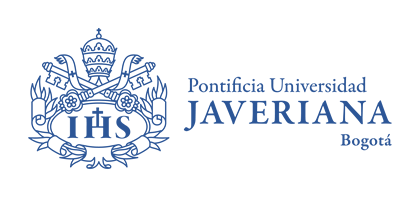

# Tecnologías emergentes - Taller regresión
## Uso de statsmodels para análisis de resultados
Este notebook aplican diferentes tipos de regresión como simple, múltiple y polinómica sobre un dataset de viviendas en Bostón.


# Descripción del Dataset

El Dataset de "The Boston Housing Dataset" fue extraído de la página de Kaggle https://www.kaggle.com/datasets/sakshisatre/the-boston-housing-dataset?resource=download. En esta página se encuentra la siguiente información acerca del Dataset:

## Sobre el Dataset

El conjunto de datos de Boston Housing, que a menudo se utiliza para análisis de regresión y tareas de modelado predictivo, normalmente no tiene un "subtítulo" oficial. Sin embargo, comúnmente se lo conoce como "conjunto de datos de viviendas de Boston" o "conjunto de datos de precios de viviendas de Boston" debido a que se centra en las características relacionadas con la vivienda y su principal variable objetivo es el valor medio de las viviendas ocupadas por sus propietarios en los suburbios de Boston.
Descripción de la columna

## Columnas:

* CRIM: tasa de criminalidad per cápita por ciudad (numérica)
* ZN: proporción de suelo residencial zonificado para lotes superiores a 25.000 pies cuadrados. (numérico)
* INDUS: proporción de acres de negocios no minoristas por ciudad (numérica)
* CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario) (categórica)
* NOX: concentración de óxidos nítricos (partes por 10 millones) (numérica)
* RM: número medio de habitaciones por vivienda (numérico)
* AGE: proporción de unidades ocupadas por sus propietarios construidas antes de 1940 (numérica)
* DIS: distancias ponderadas a cinco centros de empleo de Boston (numéricas)
* RAD: índice de accesibilidad a carreteras radiales (numérico)
* TAX: tasa de impuesto a la propiedad de valor total por $10,000 (numérico)
* PTRATIO: ratio alumnos-profesor por localidad (numérica)
* B: 1000(Bk - 0,63)^2 donde Bk es la proporción de [personas de ascendencia afroamericana] por ciudad (numérica)
* LSTAT: % estado inferior de la población (numérico)
* MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares (variable objetivo) (numérico)

# Imports

In [4]:
import seaborn as sns
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Carga de datos

In [7]:
data = pd.read_csv('Boston.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Análisis exploratorio de datos

Se realiza un análisis exploratorio de los datos para identificar la relación entre las variables y la variable objetivo, en este caso se elabora un mapa de calor para identificar la correlación entre las variables y se escogen las 3 variables con mayor correlación con la variable objetivo.

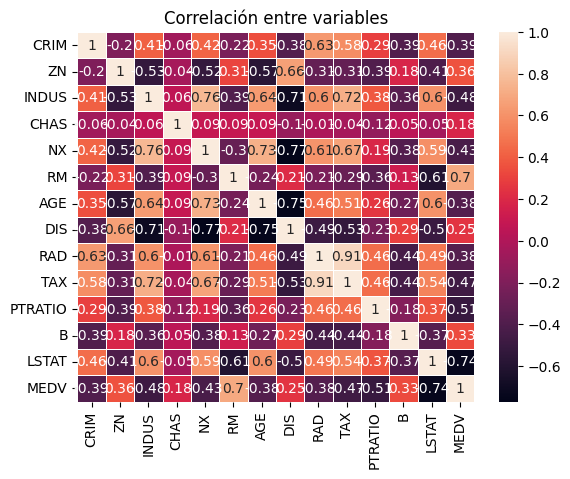

In [24]:
correlation_matrix = data.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5)
plt.title('Correlación entre variables')
plt.show()

# Selección de variables

Como se puede evidenciar en el mapa de calor las variables que tienen mayor correlación con la variable objetivo son LSTAT, RM y PTRATIO, por lo que se seleccionan estas variables para realizar el análisis de regresión.

In [26]:
X = data[['LSTAT', 'RM', 'PTRATIO']]
Y = data['MEDV']

# Gráfica de dispersión de las variables seleccionadas

Se realiza una gráfica de dispersión para identificar la relación entre las variables seleccionadas y la variable objetivo.

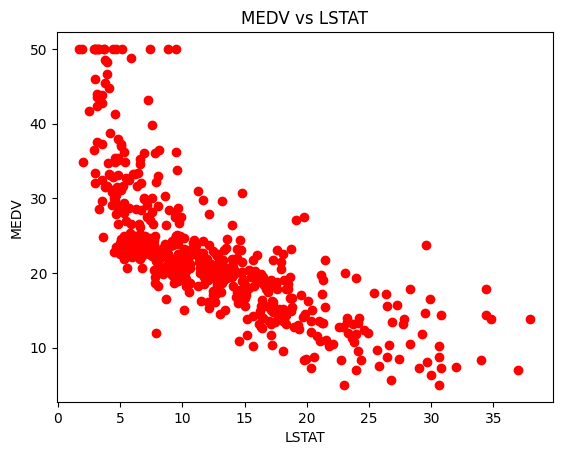

In [30]:
plt.scatter(X['LSTAT'], Y, color = 'red')
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

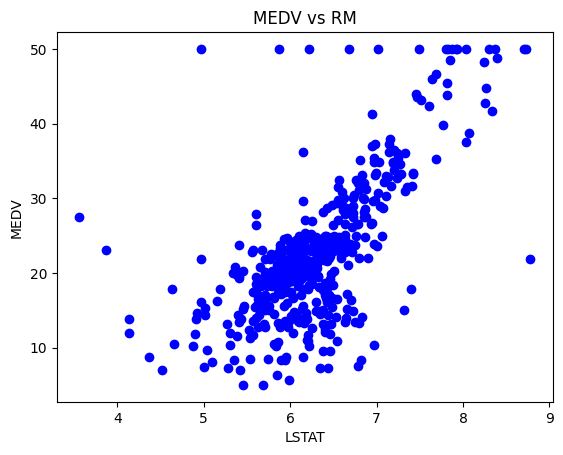

In [31]:
plt.scatter(X['RM'], Y, color = 'blue')
plt.title('MEDV vs RM')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

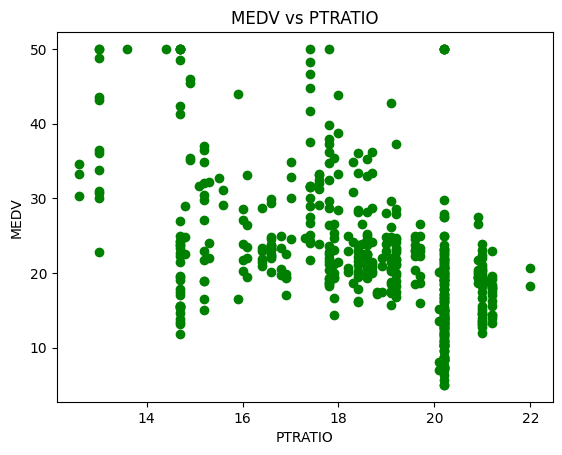

In [32]:
plt.scatter(X['PTRATIO'], Y, color = 'green')
plt.title('MEDV vs PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

# Regresión lineal simple

Se realiza una regresión lineal simple para cada una de las variables seleccionadas.

### Separación del dataset en entrenamiento y prueba

In [42]:
X_LSTAT_train, X_LSTAT_test, Y_LSTAT_train, Y_LSTAT_test = train_test_split(X['LSTAT'].to_frame(), Y, test_size = 1/3, random_state = 0)
X_RM_train, X_RM_test, Y_RM_train, Y_RM_test = train_test_split(X['RM'].to_frame(), Y, test_size = 1/3, random_state = 0)
X_PTRATIO_train, X_PTRATIO_test, Y_PTRATIO_train, Y_PTRATIO_test = train_test_split(X['PTRATIO'].to_frame(), Y, test_size = 1/3, random_state = 0)

### Entrenamiento del modelo de regresión lineal simple

In [44]:
regressor_LSTAT = LinearRegression()
regressor_LSTAT.fit(X_LSTAT_train, Y_LSTAT_train)

regressor_RM = LinearRegression()
regressor_RM.fit(X_RM_train, Y_RM_train)

regressor_PTRATIO = LinearRegression()
regressor_PTRATIO.fit(X_PTRATIO_train, Y_PTRATIO_train)

LinearRegression()

### Predicción de los resultados

In [45]:
Y_LSTAT_pred = regressor_LSTAT.predict(X_LSTAT_test)
Y_RM_pred = regressor_RM.predict(X_RM_test)
Y_PTRATIO_pred = regressor_PTRATIO.predict(X_PTRATIO_test)

### Visualización de los resultados de entrenamiento

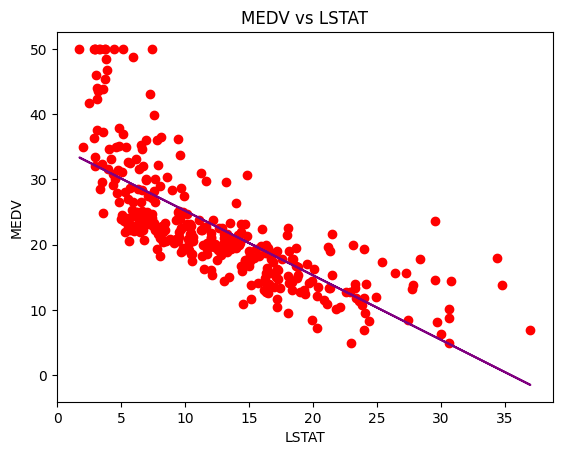

In [50]:
plt.scatter(X_LSTAT_train, Y_LSTAT_train, color = 'red')
plt.plot(X_LSTAT_train, regressor_LSTAT.predict(X_LSTAT_train), color = 'purple')
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

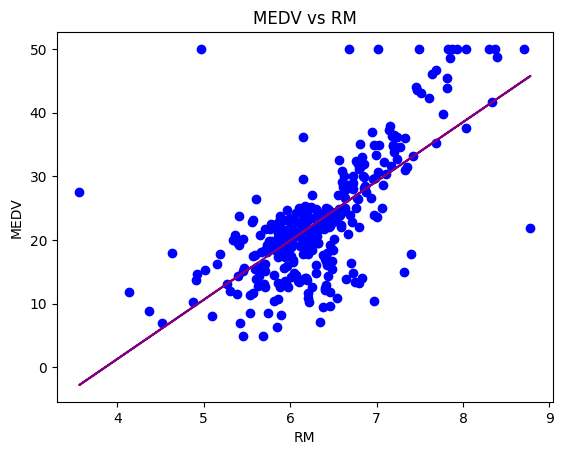

In [51]:
plt.scatter(X_RM_train, Y_RM_train, color = 'blue')
plt.plot(X_RM_train, regressor_RM.predict(X_RM_train), color = 'purple')
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

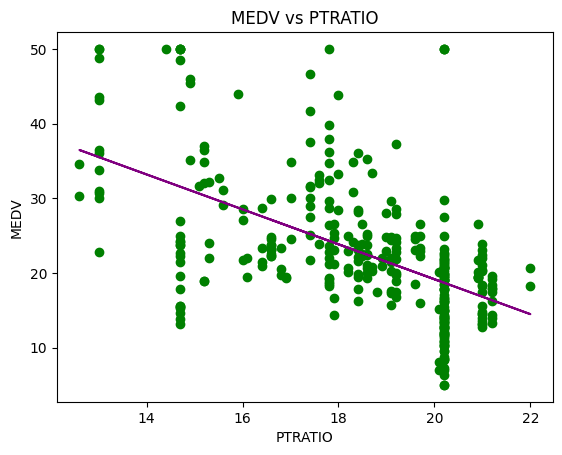

In [52]:
plt.scatter(X_PTRATIO_train, Y_PTRATIO_train, color = 'green')
plt.plot(X_PTRATIO_train, regressor_PTRATIO.predict(X_PTRATIO_train), color = 'purple')
plt.title('MEDV vs PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

### Visualización de los resultados de prueba

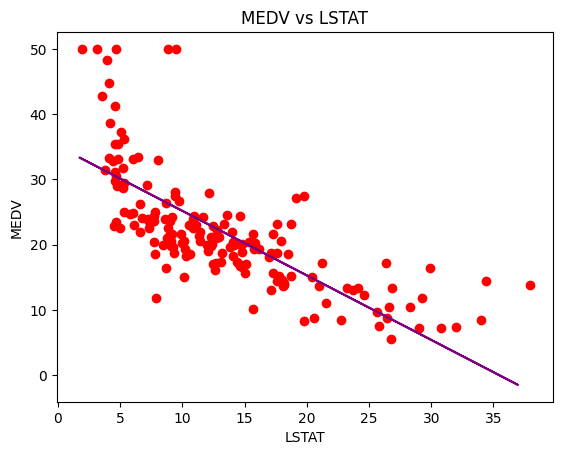

In [53]:
plt.scatter(X_LSTAT_test, Y_LSTAT_test, color='red')
plt.plot(X_LSTAT_train, regressor_LSTAT.predict(X_LSTAT_train), color='purple')
plt.title('MEDV vs LSTAT')
plt.xlabel('LSTAT')
plt.ylabel('MEDV')
plt.show()

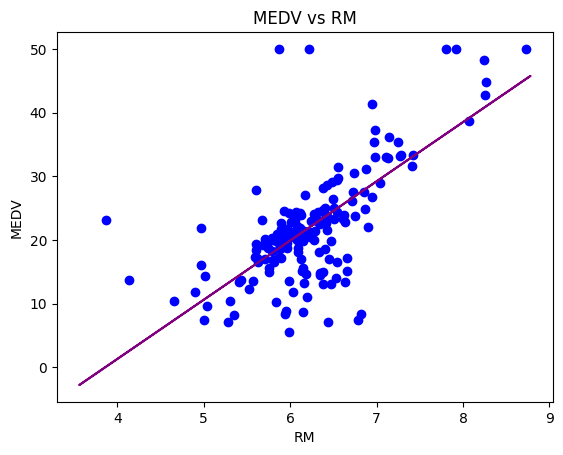

In [54]:
plt.scatter(X_RM_test, Y_RM_test, color='blue')
plt.plot(X_RM_train, regressor_RM.predict(X_RM_train), color='purple')
plt.title('MEDV vs RM')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()

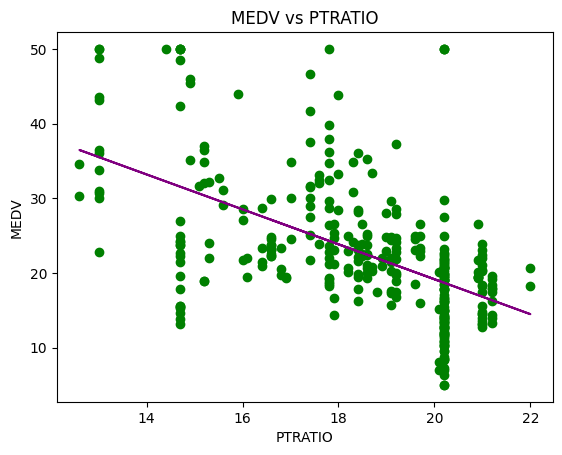

In [55]:
plt.scatter(X_PTRATIO_train, Y_PTRATIO_train, color='green')
plt.plot(X_PTRATIO_train, regressor_PTRATIO.predict(X_PTRATIO_train), color='purple')
plt.title('MEDV vs PTRATIO')
plt.xlabel('PTRATIO')
plt.ylabel('MEDV')
plt.show()

### Cálculo de la precisión de los modelos

In [56]:
print('Precisión del modelo LSTAT: ', regressor_LSTAT.score(X_LSTAT_test, Y_LSTAT_test))
print('Precisión del modelo RM: ', regressor_RM.score(X_RM_test, Y_RM_test))
print('Precisión del modelo PTRATIO: ', regressor_PTRATIO.score(X_PTRATIO_test, Y_PTRATIO_test))

Precisión del modelo LSTAT:  0.5151425477523659
Precisión del modelo RM:  0.446846413877101
Precisión del modelo PTRATIO:  0.1232383249861344


### Conclusiones de la regresión lineal simple

Como se puede observar en los resultados de la precisión de los modelos, los R^2 de los modelos son 0.53, 0.43 y 0.22 para LSTAT, RM y PTRATIO respectivamente, por lo que no existe un gran ajuste en los modelos de regresión lineal simple con las variables seleccionadas. Por lo tanto no se pueden aceptar los modelos de regresión lineal simple para predecir la variable objetivo. Por consiguiente, se procede a realizar una regresión lineal múltiple.

# Regresión lineal múltiple
Se realiza una regresión lineal múltiple con las variables seleccionadas.